<a href="https://colab.research.google.com/github/daljeetkaursaini/Daljeetkaursaini/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


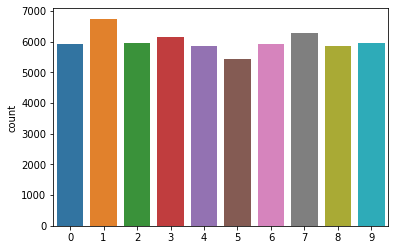

In [3]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

sns.countplot(y_train)


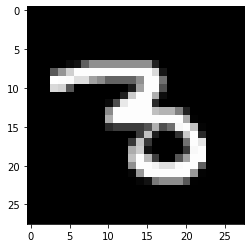

In [4]:


plt.imshow(x_train[30], cmap='gray')
plt.show()

input_shape = (28,28,1)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)


In [5]:
# plt.imshow(x_train[2], cmap='gray')
# plt.show()
batch_size = 128
num_classes = 10
epochs = 5

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

{'loss': [0.08446294814348221, 0.07812903076410294, 0.07041578739881516, 0.06560457497835159, 0.06387195736169815], 'accuracy': [0.9737592339515686, 0.9750555753707886, 0.9776852130889893, 0.9795370101928711, 0.9802963137626648], 'val_loss': [0.04100509732961655, 0.03700299933552742, 0.037868719547986984, 0.035950083285570145, 0.03110821731388569], 'val_accuracy': [0.9893333315849304, 0.9906666874885559, 0.9898333549499512, 0.9898333549499512, 0.9918333292007446]}
313/313 [==============================] - 3s 11ms/step - loss: 0.0311 - accuracy: 0.9890


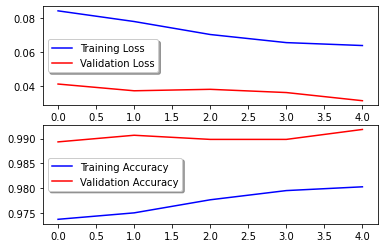

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print(history.history)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

test_loss, test_acc = model.evaluate(x_test, y_test)

Y_pred = model.predict(x_test)


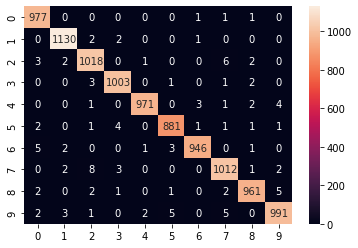

In [9]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

sns.heatmap(confusion_mtx, annot=True, fmt='g')



In [18]:
import cv2 as cv2
from google.colab.patches import cv2_imshow





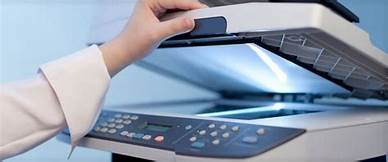

(162, 388, 3)

In [21]:


img = cv.imread('/content/th.jpg')
cv2_imshow(img)
img.shape




In [22]:


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray.shape

img_rs = cv.resize(gray, (28, 28))

img_rs.shape

cv2_imshow(img_rs)

img_rs = np.expand_dims(img_rs,0)

img_rs.shape

img_rs = np.expand_dims(img_rs,-1)

img_rs.shape

num = model.predict(img_rs)
num

rs = [0,1,2,3,4,5,6,7,8,9]

from numpy.core.fromnumeric import argmax
result = rs[argmax(num)]

result

model.save('mnist.h5')

model = load_model('mnist.h5')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0